In [ ]:
#github
#https://github.com/keon/deep-q-learning/blob/master/dqn.py

In [1]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


C:\Users\sh2\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)



In [19]:
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)

In [8]:
# -*- coding: utf-8 -*-

EPISODES = 1000
score_board = []

    # agent.load("./save/cartpole-dqn.h5")
done = False
batch_size = 32

for e in range(EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    for time in range(500):
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print("episode: {}/{}, score: {}, e: {:.2}"
                  .format(e, EPISODES, time, agent.epsilon))
            score_board.append(time)
            break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

episode: 0/1000, score: 133, e: 0.01
episode: 1/1000, score: 127, e: 0.01
episode: 2/1000, score: 417, e: 0.01
episode: 3/1000, score: 122, e: 0.01
episode: 4/1000, score: 188, e: 0.01
episode: 5/1000, score: 144, e: 0.01
episode: 6/1000, score: 224, e: 0.01
episode: 7/1000, score: 146, e: 0.01
episode: 8/1000, score: 186, e: 0.01


KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt

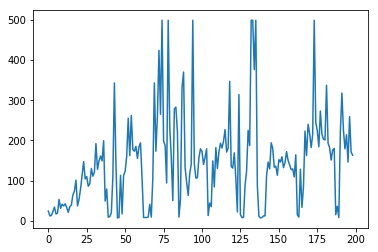

In [7]:
plt.plot(score_board)
plt.show()

In [13]:
class DQNAgent2:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen =5000)
        self.gamma = 0.95 # 보상이 느릴수록 페널티를 주기위해
        self.epsilon = 1.0 #e
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.01
        self.model = self.build_model()
        
    def build_model(self):
        model = Sequential()
        model.add(Dense(20,input_dim=self.state_size,activation='relu'))
        model.add(Dense(20, activation = 'relu'))
        model.add(Dense(self.action_size, activation = 'softmax'))
        model.compile(loss='mse' , optimizer = Adam(lr=self.learning_rate))
        return model
    
    def remember(self, state, action, rewar, next_state, done):
        self.memory.append((state,action,reward,next_state,done))
    
    def act(self, state):
        if agent.epsilon > agent.epsilon_min:
            agent.epsilon *= agent.epsilon_decay
        if np.random.rand() <= self.epsilon:
            
            return random.randrange(self.action_size)
        
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])
    
    def replay(self, batch_size):

        minibatch = random.sample(self.memory, batch_size)

        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma *np.amax(self.model.predict(next_state[0:1]))
                
                target_f = self.model.predict(state)

                target_f[0][action] = target

                self.model.fit(state, target_f,verbose=0)


In [14]:
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent_2 = DQNAgent2(state_size, action_size)

In [15]:
# -*- coding: utf-8 -*-

EPISODES = 1000
score_board_2 = []

    # agent.load("./save/cartpole-dqn.h5")
done = False
batch_size = 32

for e in range(EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    for time in range(500):
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print("episode: {}/{}, score: {}, e: {:.2}"
                  .format(e, EPISODES, time, agent.epsilon))
            score_board_2.append(time)
            break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

episode: 0/1000, score: 12, e: 0.81
episode: 1/1000, score: 13, e: 0.76
episode: 2/1000, score: 11, e: 0.71
episode: 3/1000, score: 18, e: 0.65
episode: 4/1000, score: 12, e: 0.61
episode: 5/1000, score: 8, e: 0.59
episode: 6/1000, score: 12, e: 0.56
episode: 7/1000, score: 17, e: 0.51
episode: 8/1000, score: 15, e: 0.47
episode: 9/1000, score: 9, e: 0.45
episode: 10/1000, score: 10, e: 0.43
episode: 11/1000, score: 10, e: 0.41
episode: 12/1000, score: 9, e: 0.39
episode: 13/1000, score: 22, e: 0.35
episode: 14/1000, score: 8, e: 0.34
episode: 15/1000, score: 13, e: 0.32
episode: 16/1000, score: 14, e: 0.29
episode: 17/1000, score: 9, e: 0.28
episode: 18/1000, score: 7, e: 0.27
episode: 19/1000, score: 10, e: 0.26
episode: 20/1000, score: 10, e: 0.25
episode: 21/1000, score: 12, e: 0.23
episode: 22/1000, score: 14, e: 0.22
episode: 23/1000, score: 12, e: 0.2
episode: 24/1000, score: 9, e: 0.19
episode: 25/1000, score: 9, e: 0.19
episode: 26/1000, score: 10, e: 0.18
episode: 27/1000, sc

episode: 217/1000, score: 104, e: 0.01
episode: 218/1000, score: 131, e: 0.01
episode: 219/1000, score: 151, e: 0.01
episode: 220/1000, score: 154, e: 0.01
episode: 221/1000, score: 157, e: 0.01
episode: 222/1000, score: 166, e: 0.01
episode: 223/1000, score: 171, e: 0.01
episode: 224/1000, score: 163, e: 0.01
episode: 225/1000, score: 176, e: 0.01
episode: 226/1000, score: 161, e: 0.01
episode: 227/1000, score: 155, e: 0.01
episode: 228/1000, score: 141, e: 0.01
episode: 229/1000, score: 134, e: 0.01
episode: 230/1000, score: 152, e: 0.01
episode: 231/1000, score: 34, e: 0.01
episode: 232/1000, score: 10, e: 0.01
episode: 233/1000, score: 9, e: 0.01
episode: 234/1000, score: 8, e: 0.01
episode: 235/1000, score: 9, e: 0.01
episode: 236/1000, score: 8, e: 0.01
episode: 237/1000, score: 8, e: 0.01
episode: 238/1000, score: 9, e: 0.01
episode: 239/1000, score: 9, e: 0.01
episode: 240/1000, score: 10, e: 0.01
episode: 241/1000, score: 8, e: 0.01
episode: 242/1000, score: 12, e: 0.01
episod

episode: 431/1000, score: 7, e: 0.01
episode: 432/1000, score: 9, e: 0.01
episode: 433/1000, score: 9, e: 0.01
episode: 434/1000, score: 9, e: 0.01
episode: 435/1000, score: 9, e: 0.01
episode: 436/1000, score: 12, e: 0.01
episode: 437/1000, score: 61, e: 0.01
episode: 438/1000, score: 77, e: 0.01
episode: 439/1000, score: 124, e: 0.01
episode: 440/1000, score: 105, e: 0.01
episode: 441/1000, score: 137, e: 0.01
episode: 442/1000, score: 131, e: 0.01
episode: 443/1000, score: 135, e: 0.01
episode: 444/1000, score: 156, e: 0.01
episode: 445/1000, score: 132, e: 0.01
episode: 446/1000, score: 121, e: 0.01
episode: 447/1000, score: 135, e: 0.01
episode: 448/1000, score: 182, e: 0.01
episode: 449/1000, score: 136, e: 0.01
episode: 450/1000, score: 163, e: 0.01
episode: 451/1000, score: 149, e: 0.01
episode: 452/1000, score: 119, e: 0.01
episode: 453/1000, score: 132, e: 0.01
episode: 454/1000, score: 135, e: 0.01
episode: 455/1000, score: 25, e: 0.01
episode: 456/1000, score: 8, e: 0.01
ep

KeyboardInterrupt: 

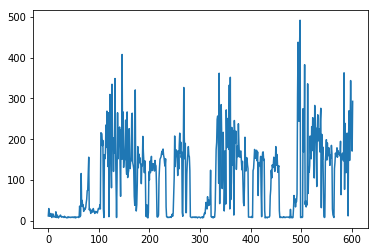

In [17]:
plt.plot(score_board)
plt.show()